# Cleaning University of Central Florida's Power Consumption Dataset
The data retrieved from [UCF's energy dashboard](http://oeis.ucf.edu/buildings/85) regarding power consumption in UCF's Engineering (Harris Corporation Engineering Center) building is in the form of a json format. Here we'll be converting it into a csv file for later data analysis.

In [2]:
import numpy as np
import pandas as pd
import json
import pprint
from datetime import datetime

In [57]:
#Helper functions

#Conversion from kBTU (Current unit) to kWH (Metric System)
def convert_kwh(kbtu_unit):
    return kbtu_unit * 0.29307106944 

#Conversion of dates into datetime objects
def convert_dates(dates):
    return [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

In [58]:
with open('Datasets/UCF_PowerConsumption.json') as json_file:
    data = json.load(json_file)[0]
    
pprint.pprint(data)

{'key': 'Electric',
 'values': [{'reading': 15802.633929208, 'timestamp': '2019-01-01'},
            {'reading': 28332.391676481, 'timestamp': '2019-01-02'},
            {'reading': 26559.782773344, 'timestamp': '2019-01-03'},
            {'reading': 26285.734826599, 'timestamp': '2019-01-04'},
            {'reading': 27307.186213573, 'timestamp': '2019-01-05'},
            {'reading': 30126.842329202, 'timestamp': '2019-01-06'},
            {'reading': 28304.748071398, 'timestamp': '2019-01-07'},
            {'reading': 27630.719736305, 'timestamp': '2019-01-08'},
            {'reading': 29287.293300017, 'timestamp': '2019-01-09'},
            {'reading': 32727.73807278, 'timestamp': '2019-01-10'},
            {'reading': 32279.637286142, 'timestamp': '2019-01-11'},
            {'reading': 27837.535526045, 'timestamp': '2019-01-12'},
            {'reading': 27636.86276255, 'timestamp': '2019-01-13'},
            {'reading': 29105.049836577, 'timestamp': '2019-01-14'},
            {'re

In [54]:
#Create new dataframe to store data
df_power = pd.DataFrame(columns = ['power', 'date'])
df_power.head()

,power,date


In [61]:
readings = data['values']

for entry in readings:
    #Get corresponding values
    date = entry['timestamp']
    power = convert_kwh(float(entry['reading']))
    
    #Add to dataframe
    df_power = df_power.append({"power": power, "date": date}, ignore_index=True)
    
df_power.head()

,power,date
0,4631.294837,2019-01-01
1,8303.404349,2019-01-02
2,7783.903961,2019-01-03
3,7703.588436,2019-01-04
4,8002.946287,2019-01-05


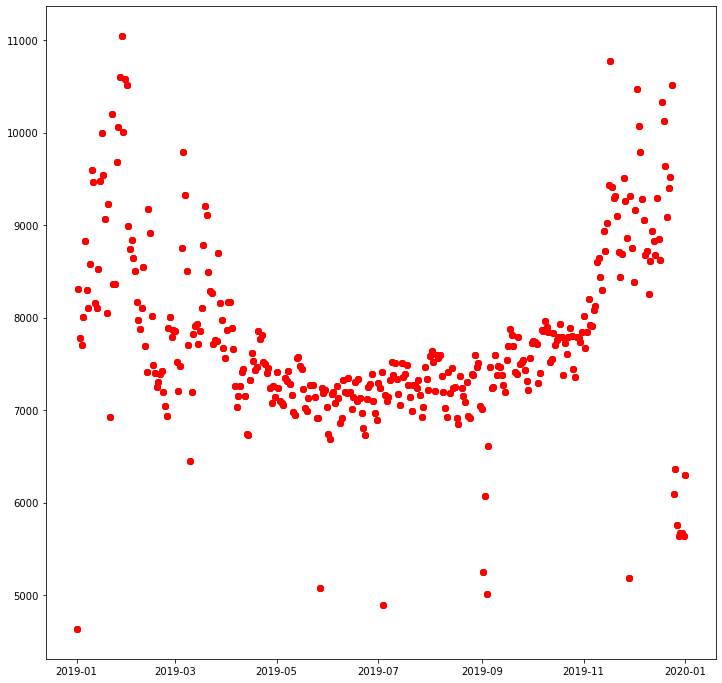

In [63]:
#Plotting data for exploratory analysis
from matplotlib.dates import date2num
import matplotlib.pyplot as plt

#Select subset of data by altering variables. Choose entire scale by 1, 0
num_split = 1
num_piece = 0
df = np.split(df_power, num_split)[num_piece]

plt.figure(figsize=(12,12))
#Change y-range
#Convert timestamps into correct date format for matplotlib
dates = date2num(convert_dates(df['date']))
#Plot points
plt.plot_date(dates, df['power'], color='Red')
plt.show()

In [64]:
#Place dataset in .csv file
df_power.to_csv('Datasets/UCF_PowerConsumption.csv', index=False)